In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 준비

In [80]:
from sklearn.datasets import load_iris 

# 붓꽃 데이터셋 로딩 
iris = load_iris() 
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
14,5.8,4.0,1.2,0.2,0
107,7.3,2.9,6.3,1.8,2
1,4.9,3.0,1.4,0.2,0


# k-means clustering

### 엘보우 기법

In [40]:
# 엘보우 기법으로 최적의 k 찾기
from sklearn.cluster import KMeans
inertia = []
for n in range(2,7):
    km = KMeans(n_clusters=n)
    km.fit(iris.data)
    print(km.inertia_)
    inertia.append(km.inertia_)

152.34795176035792
78.8556658259773
57.38387326549491
50.16408239949712
45.858602539448384


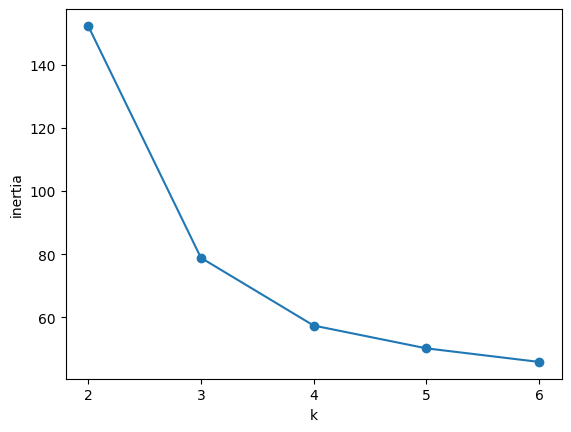

In [41]:
plt.plot(range(2,7), inertia, marker='o')
plt.xticks(range(2,7))
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

### 실루엣 분석

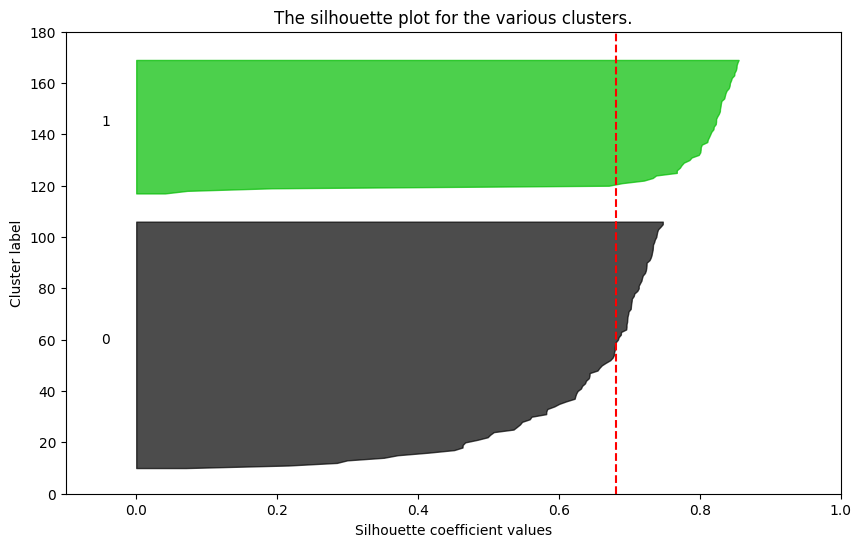

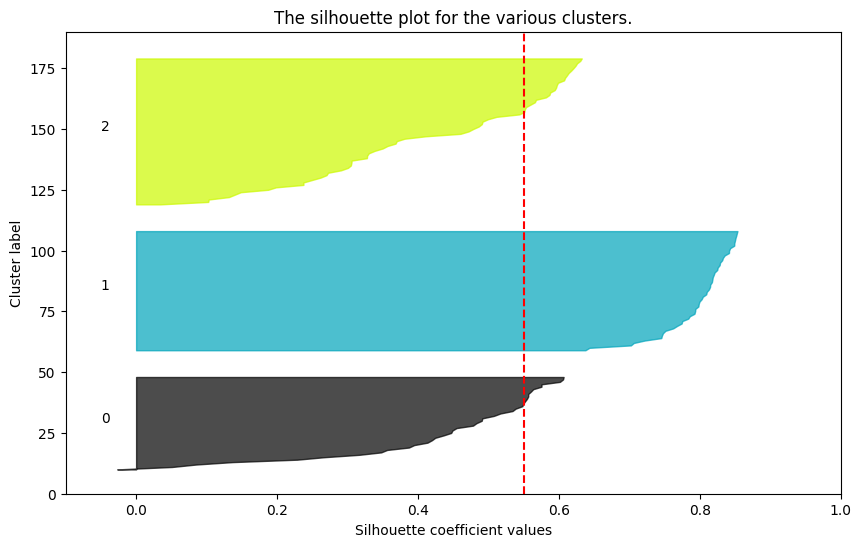

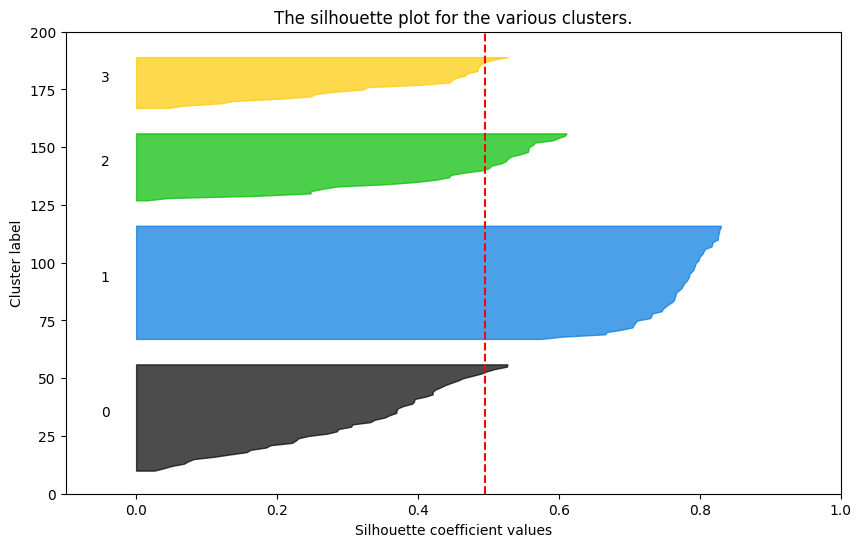

In [82]:
# 최적의 실루엣 찾기
import silhouette_analysis as s
for k in range(2,5):
    s.silhouette_plot(iris.data, k)

## 클러스터링

In [83]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
df_iris['kmeans'] = km.fit_predict(iris.data)
df_iris.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,kmeans
119,6.0,2.2,5.0,1.5,2,2
27,5.2,3.5,1.5,0.2,0,1
16,5.4,3.9,1.3,0.4,0,1


In [44]:
df_iris[['species','kmeans']].value_counts()

species  kmeans
0        1         50
1        2         47
2        0         36
         2         14
1        0          3
Name: count, dtype: int64

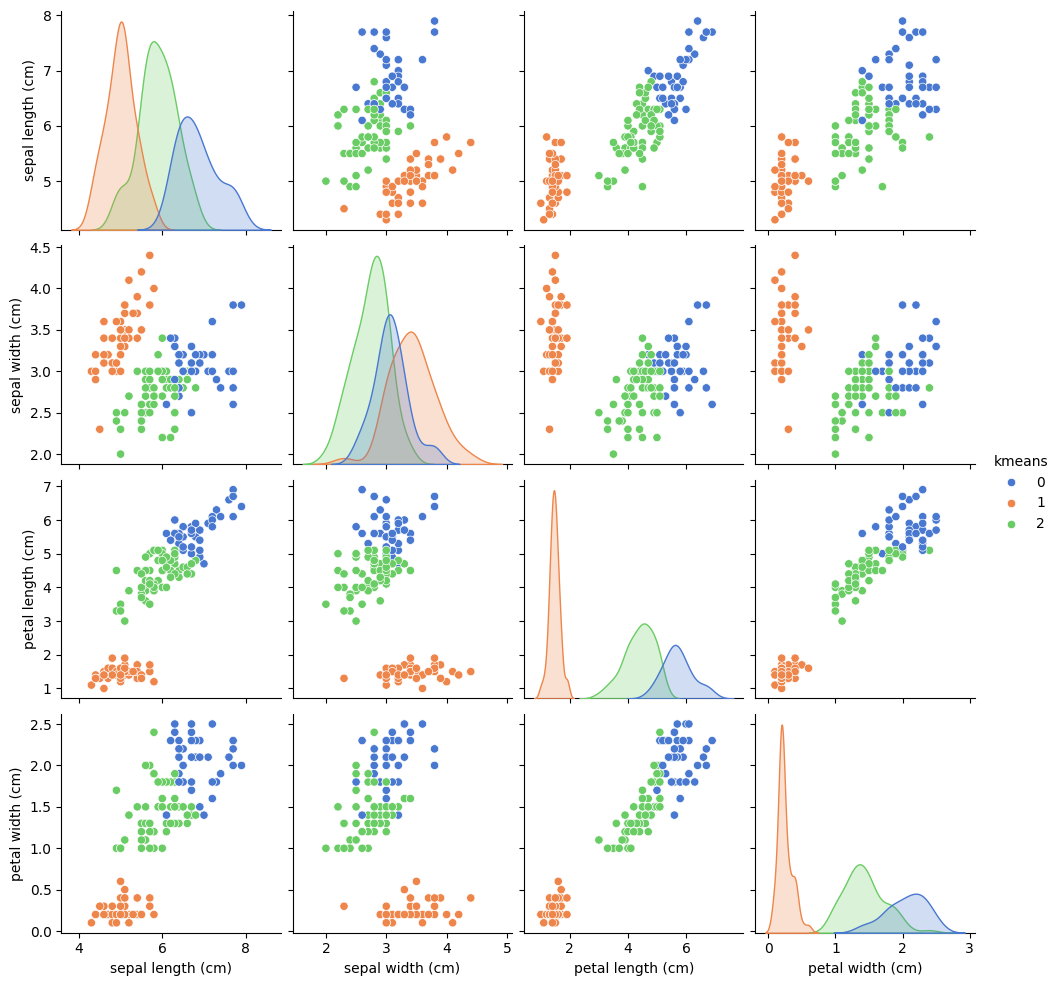

In [89]:
df = df_iris.iloc[:,[0,1,2,3,5]]
sns.pairplot(df, hue='kmeans', palette='muted')

# DBSCAN

In [101]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
df_iris['dbscan'] = dbscan.fit_predict(iris.data)
display(df_iris.sample(3))
print(df_iris['dbscan'].value_counts())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,kmeans,dbscan
69,5.6,2.5,3.9,1.1,1,2,1
135,7.7,3.0,6.1,2.3,2,0,1
104,6.5,3.0,5.8,2.2,2,0,1


dbscan
 1    98
 0    50
-1     2
Name: count, dtype: int64


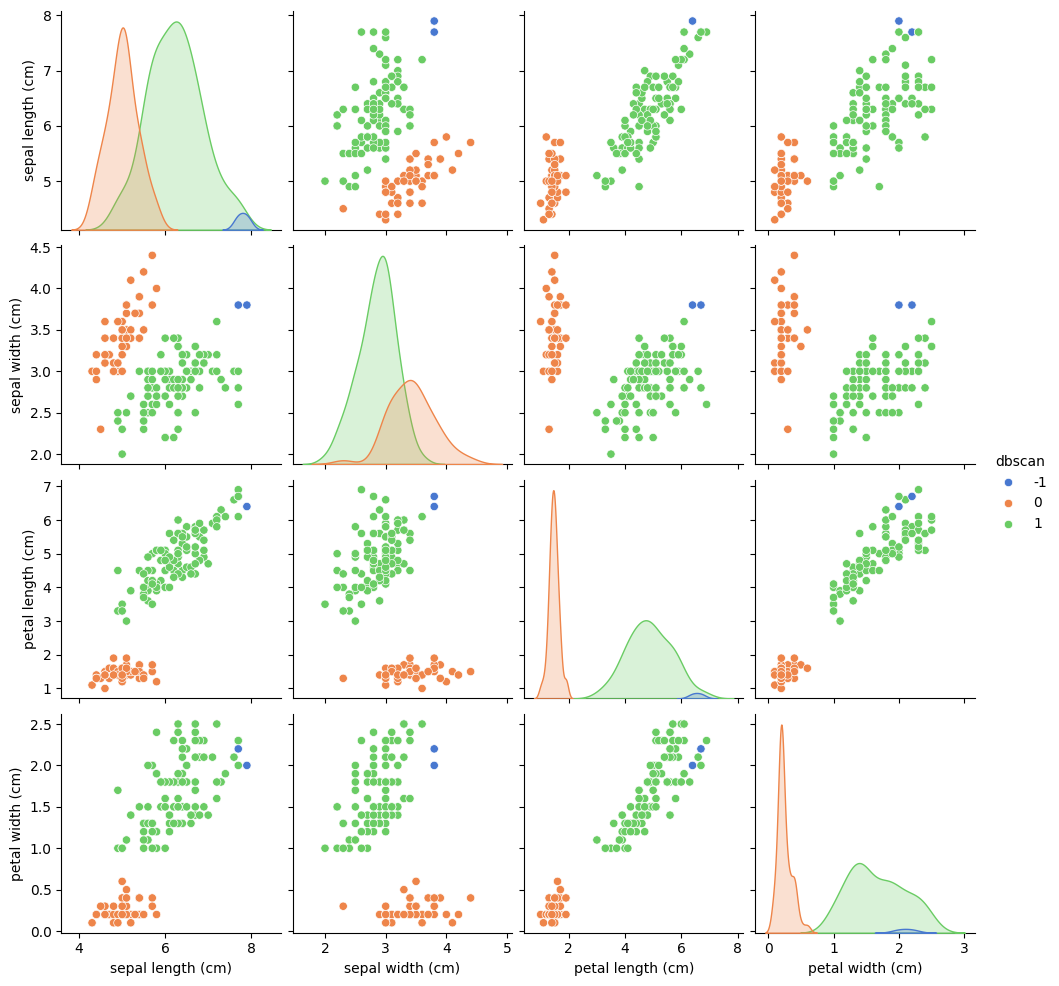

In [102]:
df = df_iris.iloc[:,[0,1,2,3,6]]
sns.pairplot(df, hue='dbscan', palette='muted')
plt.show()